<a href="https://colab.research.google.com/github/maticvl/dataHacker/blob/master/3DFACEMODELING/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

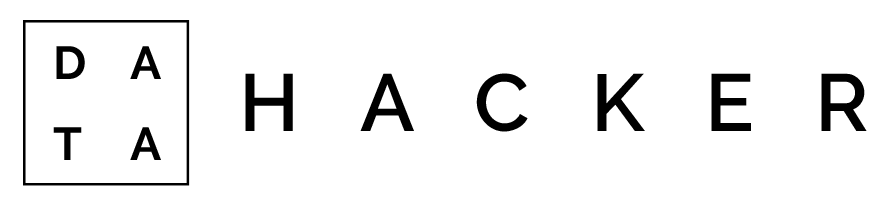
# PCA in Python

For our first experiment in Python, we are going to calculate the principal components of 100 data points that are spread in a 2D space. Once we compute the principal components, we will reconstruct the original data from those components. So, let’s begin.

First, we will import the necessary libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

Next, we will create 100 random points using the np.random.randn() function. Then, we will scatter the points along x1 and x2. Here, x1 represents the values spread along x-axis, and x2 represents the values spread along y-axis.

(-3.4171255488602967,
 2.919797593147575,
 -10.941594067815323,
 12.06394497048281)

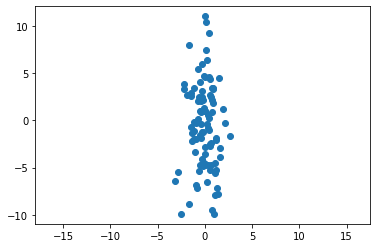

In [2]:
N=100
x1= np.random.randn(N)
x2 = np.random.randn(N)*5

plt.scatter(x1, x2)
plt.axis('equal')

In order to spread points diagonally we are going to modify x2 axis in the following way:
*   we will multiply the vector x2 with 0.1
*   add those values to the vector x1


(-3.4171255488602967,
 2.919797593147575,
 -3.4654826865304544,
 3.0222198597197485)

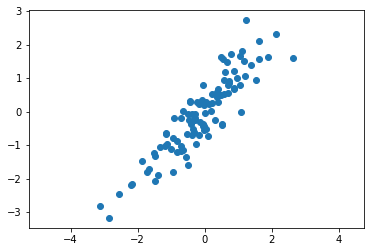

In [3]:
x2 = np.random.randn(N)*5
x2 = x1 + x2*0.1
plt.scatter(x1, x2)
plt.axis('equal')

As you can see, the points are now spread in the shape of an ellipse. This is the ideal example where we can apply PCA

The next step is to apply PCA. We are going to choose a parameter n_components to be is equal to 2. This is the maximum number of components that we can take, as our vectors are 2 elements long.

Next, we will create the matrix X by combining the coordinates of our data points x1 and x2. rearranging our data coordinates to shape (100, 2). To do that we will use the function np.vstack(). Also, we are going to transpose our matrix. Finally, we will optimize our model using the function pca.fit(). In the background this function is performing the following computations:

Subtract the mean from each of the data points.

Calculate the covariance matrix

Calculate the eigenvalues and eigenvectors based on the covariance matrix

Calculated eigenvectors are the principal components of the data set.


In [4]:
pca = PCA(n_components=2)
X = np.vstack([x1,x2])
X = X.T
pca.fit(X)

PCA(n_components=2)

Here, we can print our PCA components.



In [5]:
V = pca.components_
print(V)

[[-0.66526977 -0.74660306]
 [ 0.74660306 -0.66526977]]


Next, we will draw principal components as black arrows over our data points.



(-3.4171255488602967,
 2.919797593147575,
 -3.4654826865304544,
 3.0222198597197485)

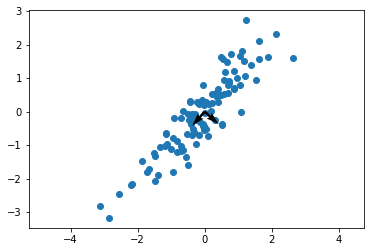

In [6]:
plt.scatter(x1, x2)
plt.quiver(V[0,0],V[0,1])
plt.quiver(V[1,0],V[1,1])

plt.axis('equal')

Next, we will select one point out of 100 and call it X_test. We want to perform dimensionality reduction on this point based on the principal component that our PCA has learned.

In [7]:
x_test = np.array( [x1[0], x2[0]]).reshape(1,-1)
print(x_test)

[[0.35798474 0.58579381]]


Now, let’s visualize our x_test point.

(-3.4171255488602967,
 2.919797593147575,
 -3.4654826865304544,
 3.0222198597197485)

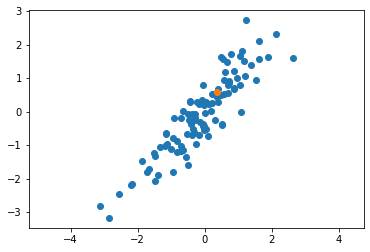

In [8]:
plt.scatter(x1, x2)
plt.scatter(x_test[0,0], x_test[0,1])
plt.axis('equal')

Next, we want to present x_test point as a component of two axes. Then, we will create a variable alpha where we will store the coefficients of the applied PCA transform. The first coefficient α1 corresponds to the first PCA component and the second coefficient α2 corresponds to the second PCA component.

In [9]:
# here we decompose a x_test data point onto principal components
x_test_transformed = pca.transform(x_test)
alpha = x_test_transformed
# we store in alpha the coefficients of the applied pca transform
# first coefficients corresponds to the first PCA component and second to the second respectively 
print(alpha)

[[-0.80233244 -0.09440859]]


To better understand this process, let’s visualize our alpha components. Take a look at the following graph.



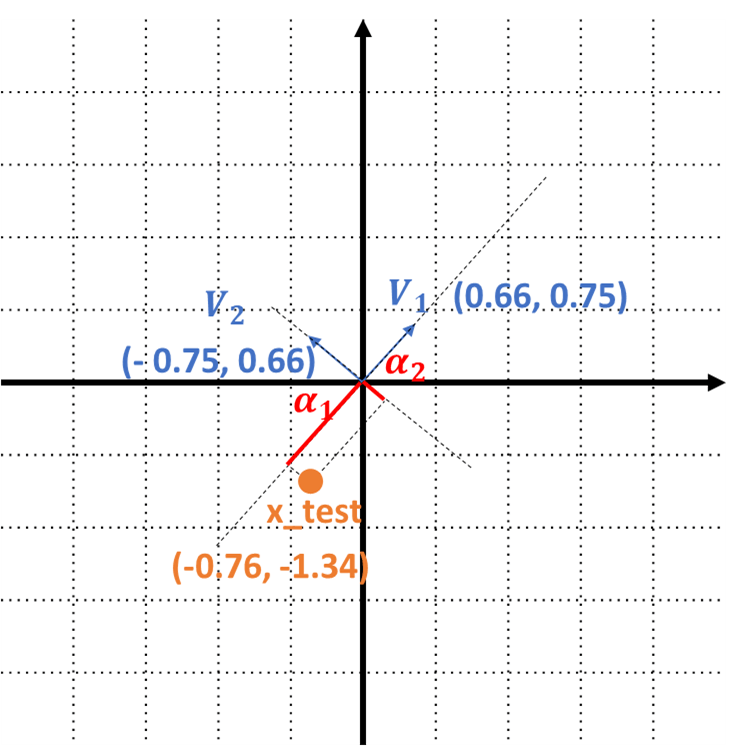

Here, we can see that alpha coefficients are the projections of the x_test point onto the first and the second PCA component.

Next, we want to see if we are going to get X_test point if we simply multiply principal components and add them together. For that, we will use the following formula.

In [11]:
# with this formula we can go back from "coordinates" in PCA 
# defined coordinate system to the original (x1, y1) coordinate system
x_test_rec = V[0]*alpha[0,0] + V[1] * alpha[0,1]

print("Coefficients of the pca transformation", alpha)
print("Eigenvectors or principal components",V)
print("x_test:", x_test)
print("x_test_reconstructed", x_test_rec)

# here the data will not perfectly match 
# the reason for this is that before computing a covariance matrix, 
# data was "zero-meaned"

Coefficients of the pca transformation [[-0.80233244 -0.09440859]]
Eigenvectors or principal components [[-0.66526977 -0.74660306]
 [ 0.74660306 -0.66526977]]
x_test: [[0.35798474 0.58579381]]
x_test_reconstructed [0.46328178 0.66183104]


However, here the data will not perfectly match. The reason for this is that before computing a covariance matrix, data was “zero-meaned”.

We are going to solve this problem by calculating alpha_manual which is equal to the dot product of x_test, and PCA components. The goal of this dot product is to calculate the length of the projection x_teston the first principal component, as well as on the second one. For better visualization and understanding in the following example, we will use round numbers.

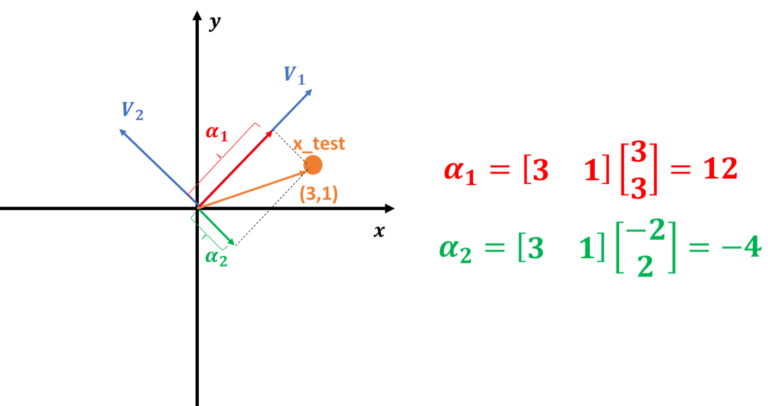

Note that in the following formula the original mean values are subtracted from the X_test point.



In [12]:
alpha_manual =  np.dot(x_test - pca.mean_, pca.components_.T)

print("alpha manual",  alpha_manual)
print("alpha via sklearn", alpha)

alpha manual [[-0.80233244 -0.09440859]]
alpha via sklearn [[-0.80233244 -0.09440859]]


As you can see our alpha_manual is equal to the alpha calculated via sklearn library.

Finally, we can back-reconstruct the data from the PCA coefficients. We can see that when we include the pca.mean_ in the calculations we get the same data, and also the same reconstruction.

In [13]:
# back-reconstruct the data from the PCA coefficients

x_test_rec = np.dot(alpha_manual, pca.components_.T) + pca.mean_
print("x_test_rec", x_test_rec)
print("x_test", x_test)

x_test_rec [[ 0.49895622 -0.6122539 ]]
x_test [[0.35798474 0.58579381]]


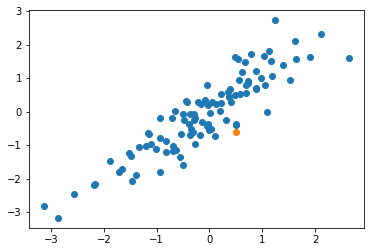

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(x_test_rec[0][0], x_test_rec[0][1])

Here, we can see our reconstructed point from the PCA coefficients.



## PCA components in depth

Now that we know how PCA works, let’s dive deeper into the PCA components. In our previous example, we performed PCA on a set of random points. However, usually, we will perform PCA on a set of real-world data, for example, human faces. We want PCA to tell us which components are the most important ones and which are not bringing a lot of information.

In order to understand these components, we will generate a set of points that form rectangles. Looking at the examples below, we can see that the first rectangle has a perfect shape, the second has the point at the bottom right shifted a bit to the left, and the third one has one point shifted to the left and up.

[-2.0, 2.5, -2.0, 2.0, -2.0, 2.5, -2.0, 2.0, -2.0, 2.5, -2.0, 2.0]

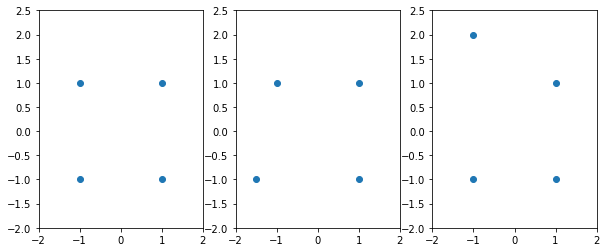

In [16]:
x_temp0 = np.array ([[-1,-1]  , [1,-1], [1,1], [-1,1]])
x_temp1 = np.array ([[-1.5,-1], [1,-1], [1,1], [-1,1]])
x_temp2 = np.array ([[-1,-1]  , [1,-1], [1,1], [-2,2]])

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].scatter(x_temp0[:, 0], x_temp0[:, 1])
axs[1].scatter(x_temp1[:, 0], x_temp1[:, 1])
axs[2].scatter(x_temp0[:, 0], x_temp2[:, 1])
plt.setp(axs, ylim=[-2, 2.5], xlim=[-2, 2])

Based on these rectangles we will create a random dataset by adding noise to the points. First, we will iterate 100 times, and add some additional noise into the vector X where all the elements of 3 rectangles are stored. In order to apply PCA to these points we need to reshape them so that all the values are flattened into an array. So, the final shape of the vector X will be 300×8.

(-3.0, 3.0, -3.0, 3.0)

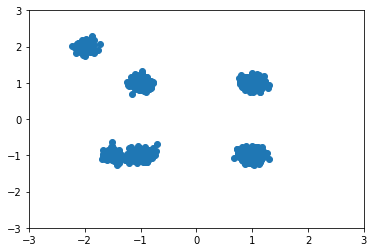

In [17]:
X=[]
for i in range(100):
    X.append(x_temp0.reshape(-1) + np.random.randn(8)  * 0.1)
    X.append(x_temp1.reshape(-1) + np.random.randn(8)  * 0.1 )
    X.append(x_temp2.reshape(-1) + np.random.randn(8)  * 0.1 )
    
X = np.array(X)
plt.scatter(X[:,::2],X[:,1::2])
plt.axis([-3,3,-3,3])

Looking at the image above, we can see that we have rectangles with added noise. Furthermore, we can see 4 blobs that form a perfect rectangle, and additional two points that are shifted out of the rectangle zone. Now, imagine that these shapes have the same topology and they represent a very simple geometry, something that we can have in faces (4 points that are very similar to a simple face).

Visually we can see that these are 4 points with 2 coordinates, but these essentially make a vector of 8 elements. Unfortunately, it is impossible for us to illustrate 8 dimensions. When we work with PCA we need to flatten elements to get a single vector of n elements. However, looking at this 8-element long vector, every 2nd element, starting from the 0th index, represents the x coordinate, and every 2nd, starting from the 1st index represents the y coordinate.

Now, we will apply PCA to our data. We will choose a parameter n_components to be equal to 8. This is the maximum number of components that we can take, as our vectors are 8 elements long.

In [18]:
pca = PCA(n_components=8)
pca.fit(X)

PCA(n_components=8)

The first insight into the result would be to plot the mean of the data. Looking at the plot, we can see that the 2 points in the far-right part with the coordinates of $[1,-1] $ and $[1,1]$ were never changed. On the other hand, we can see that two other points are shifted a little bit. The bottom-left point is shifted to the left and the top-left point is shifted up and to the left. Once we compute our PCA components and examine them, we can add these mean values to our data, and then we will be able to reconstruct them.

(-3.0, 3.0)

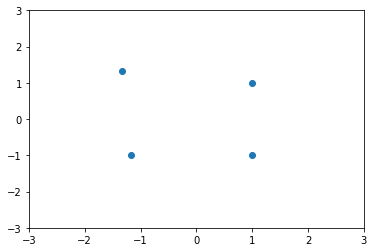

In [19]:
plt.scatter(pca.mean_[0:8:2], pca.mean_[1:8:2])
plt.xlim([-3,3])
plt.ylim([-3,3])

Next, we can plot the first PCA component that we have obtained, and also we can print the values. Again, every 2nd element, starting from the 0th index, represents the x coordinate, and every 2nd, starting from the 1st index, represents the xcoordinate.

[ 1.97797376e-01  2.83422248e-03 -6.10901799e-03  2.74739082e-03
 -9.93125172e-03  5.83102693e-04 -6.89331614e-01  6.96811490e-01]


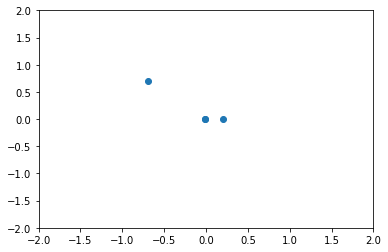

In [20]:
plt.scatter(pca.components_[0,0:8:2], pca.components_[0,1:8:2])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
print(pca.components_[0])

Looking at the plot and the values, we can see that 2 points are shifted and not located at the [0,0] coordinate. This means that they have a bigger variance and hold more information than the 2 other points for this principal component. Looking at the values, we can see that the 1st point is just shifted to the left by 0.18 and not that much in the y direction. At the same time, the 4th point is shifted both in the x and y direction.

Now, let’s have a look at the plot of the second principal component. We can see a very similar pattern. The 1st and the 4th point are shifted and the other 2 points are not modified at all.



[ 9.78183445e-01  9.11190575e-04  1.15270194e-02 -2.38172579e-02
 -2.42485579e-02 -2.38721475e-02  1.04837007e-01 -1.74090531e-01]


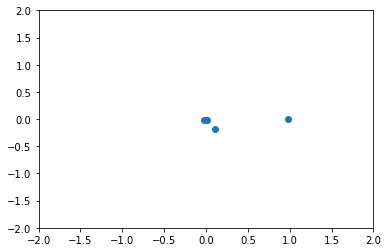

In [21]:
plt.scatter(pca.components_[1,0:8:2], pca.components_[1,1:8:2])
plt.xlim([-2, 2])
plt.ylim([-2, 2])
print(pca.components_[1])

Now, we have seen what these PCA components look like. Lastly, we want to understand how we can reduce dimensionality or shrink this dataset. The PCA calculates how much variance each feature in a dataset has. By visualizing these values, we can decide how many PCA components we want to keep.



[0.81492299 0.08266671 0.02143391 0.0206541  0.01817604 0.01573802
 0.01336797 0.01304026]


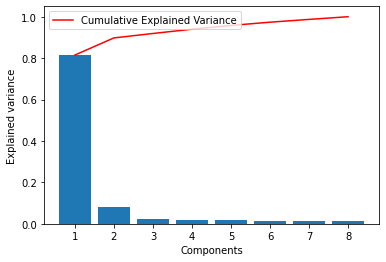

In [22]:
plt.bar(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ )
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")

plt.legend(loc='upper left')
print(pca.explained_variance_ratio_)

The graph above shows the following. If we pick the first 3 components, we will have approximately 90% of our data nicely reconstructed. Therefore, we can discard the other dimensions. This is the idea of how we can illustrate PCA and this will hopefully help us in how we can apply the same idea to faces. Instead of having these rectangles, we will have a very large vector with high dimensionality. So, by applying PCA we will lower this number of dimensions, thereby lowering the complexity. For example, instead of having 5000 vectors, we will lower it to just 80 vectors.